In [1]:
y = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])
t = np.array([94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48])


In [2]:
import pystan
import scipy.stats as stats


- Write the model and run for 10,000 iterations using the No U-Turn Sampler (30 points)

In [5]:
%%time
nuclear_pump_code = """
data {
    int<lower=0> n; 
    int y[n];
    real t[n];
}
transformed data {}
parameters {
    real<lower=0> a;
    real<lower=0> b;
    real<lower=0> lambda[n];
}
transformed parameters {}
model {
    a ~ gamma(1.8, 1.0);
    b ~ gamma(10, 1.0);
    for(i in 1:n) {
        lambda[i] ~ gamma(a,b);
        y[i] ~ poisson(lambda[i]*t[i]);
  }
}
generated quantities {
    vector[n] y_tilde;
    for(j in 1:n){
        y_tilde[j] <- poisson_rng(lambda[j]*t[j]);
    }
}
"""

nuclear_pump_dat = {
            'n': 10,
            'y': y,
            't': t,
            }

fit = pystan.stan(model_code=nuclear_pump_code, data=nuclear_pump_dat, iter=10000, chains=1, warmup=9000)

CPU times: user 1.4 s, sys: 41.1 ms, total: 1.44 s
Wall time: 30.8 s


In [4]:
print(fit)

Inference for Stan model: anon_model_9c11ff9f40e33ea0feed21b3c560d70b.
1 chains, each with iter=10000; warmup=9000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a            1.87    0.03   0.56   0.95   1.48   1.81    2.2   3.12    274    1.0
b            5.03    0.09   1.54   2.49   3.96   4.84   5.98   8.46    266    1.0
lambda[0]    0.07  1.5e-3   0.03   0.03   0.05   0.07   0.08   0.13    332    1.0
lambda[1]    0.14  4.4e-3   0.08   0.03   0.08   0.12   0.18   0.33    334    1.0
lambda[2]     0.1  2.2e-3   0.04   0.04   0.07    0.1   0.13    0.2    334    1.0
lambda[3]    0.12  1.8e-3   0.03   0.07    0.1   0.12   0.14   0.19    328    1.0
lambda[4]    0.47    0.01   0.23   0.14   0.31   0.44    0.6    1.0    334    1.0
lambda[5]    0.57  7.5e-3   0.14   0.33   0.48   0.57   0.66   0.87    334    1.0
lambda[6]     0.5    0.02   0.34   0.08   0.25   0.43   0.65   1.36    3

- Plot the traces and distributions of the last 10% for $\lambda_i$, $\alpha$ and $\beta$ (there should be 12 sets of plots) (10 points)

In [15]:
nuclear_pump_dict = fit.extract()
nuclear_pump_dict.keys()

odict_keys(['a', 'b', 'lambda', 'y_tilde', 'lp__'])

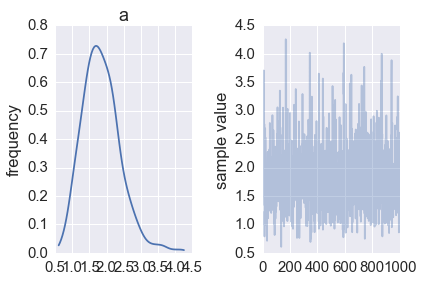

In [16]:
fit.plot('a')
plt.tight_layout()

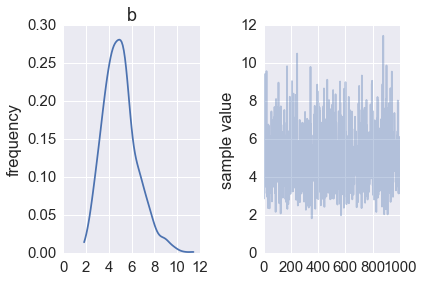

In [17]:
fit.plot('b')
plt.tight_layout()

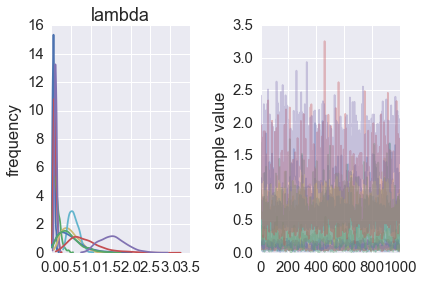

In [18]:
fit.plot('lambda')
plt.tight_layout()

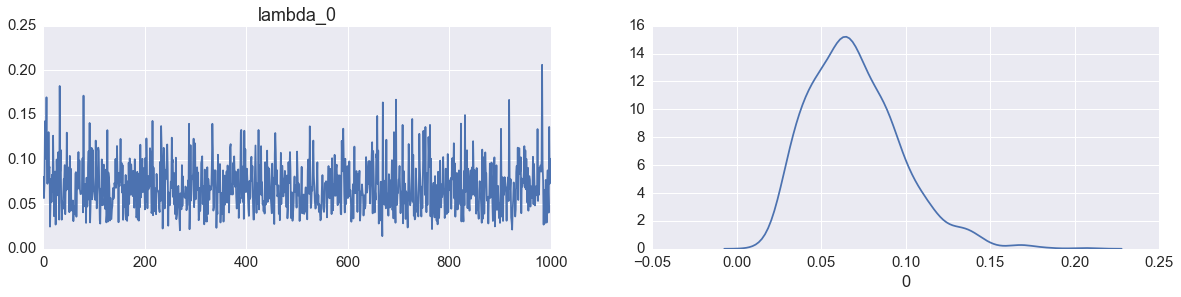

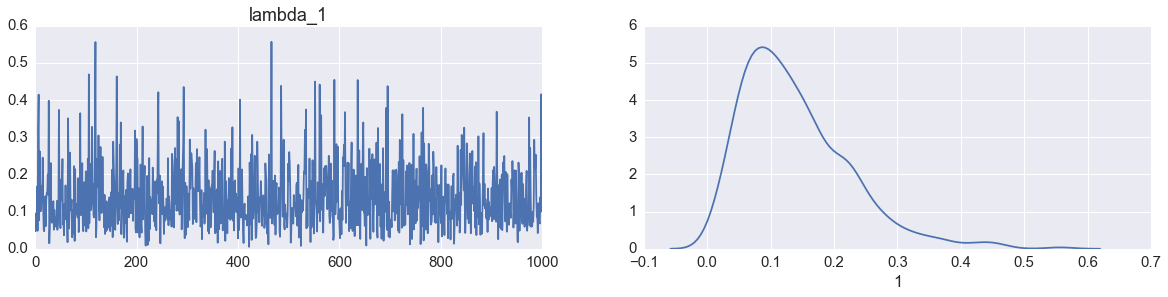

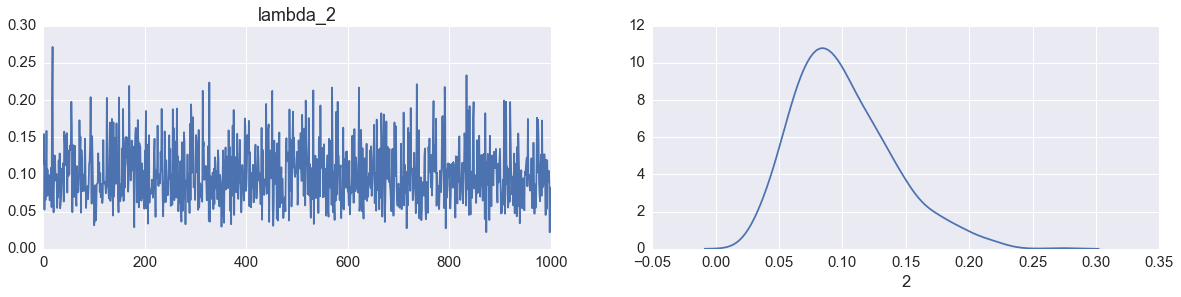

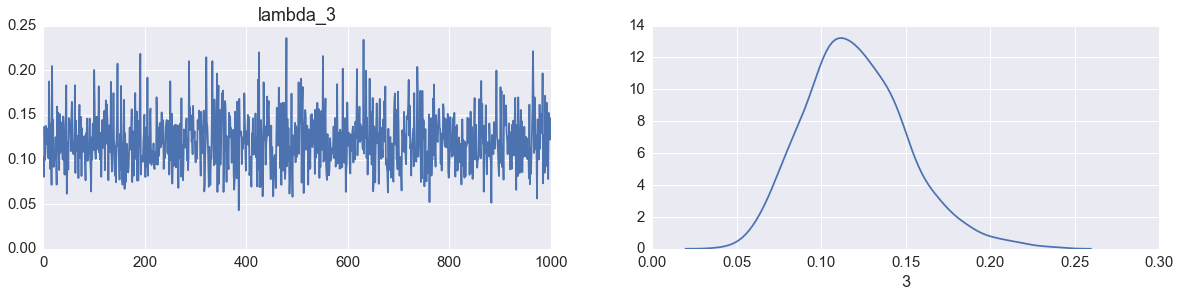

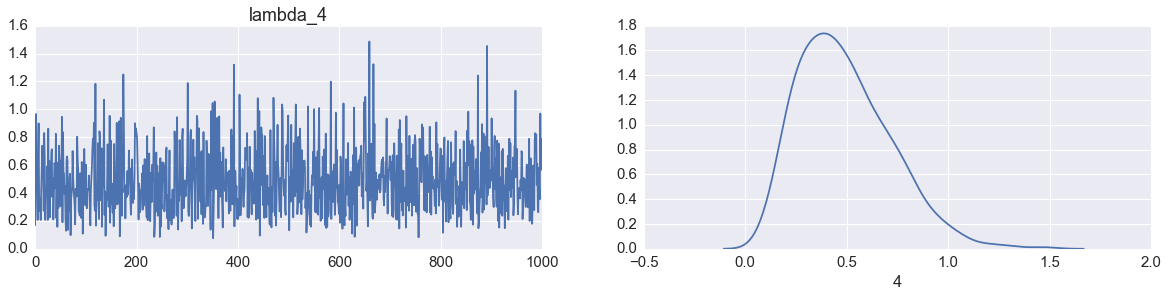

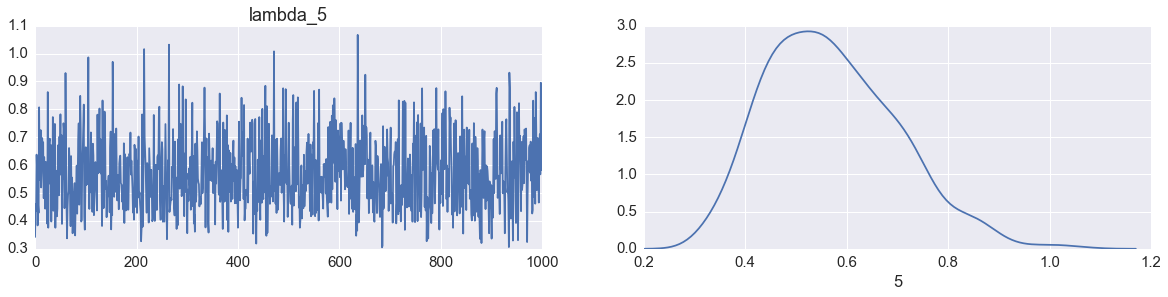

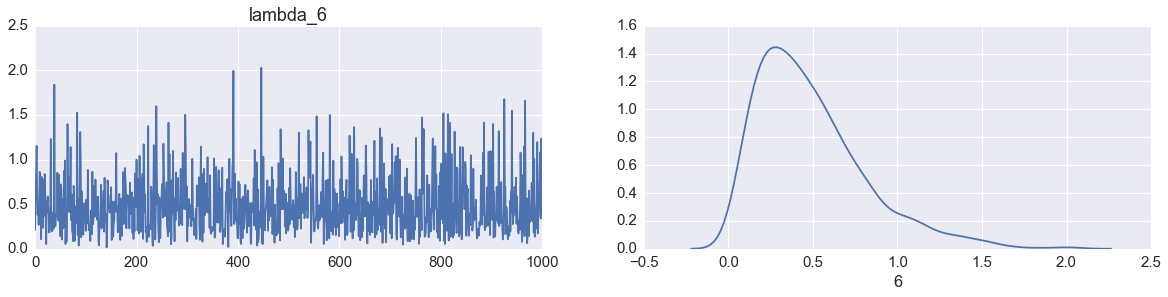

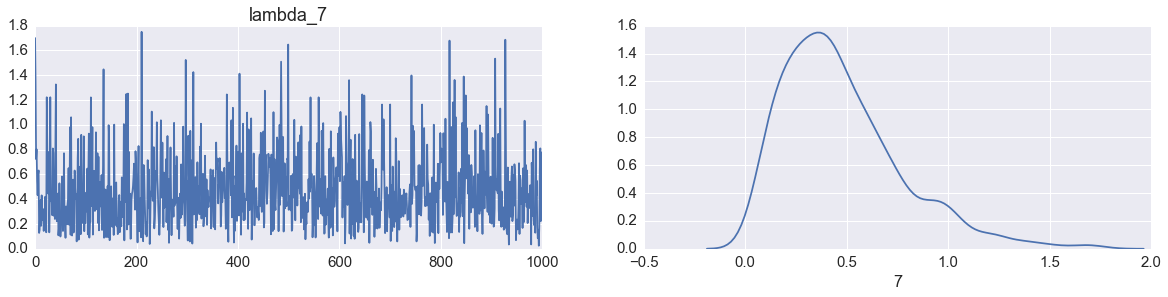

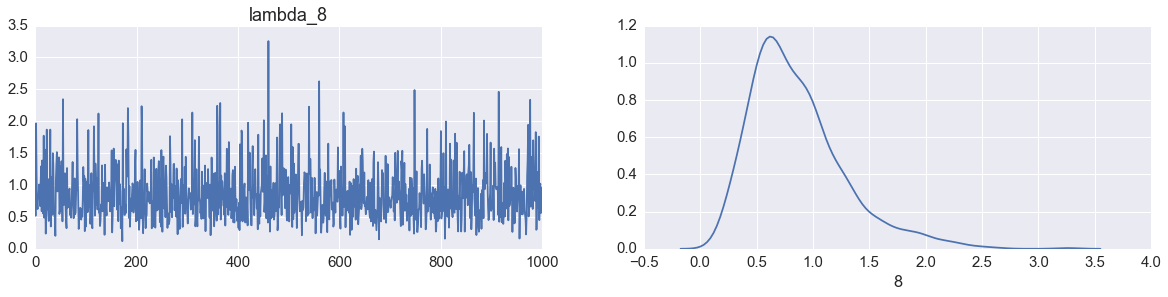

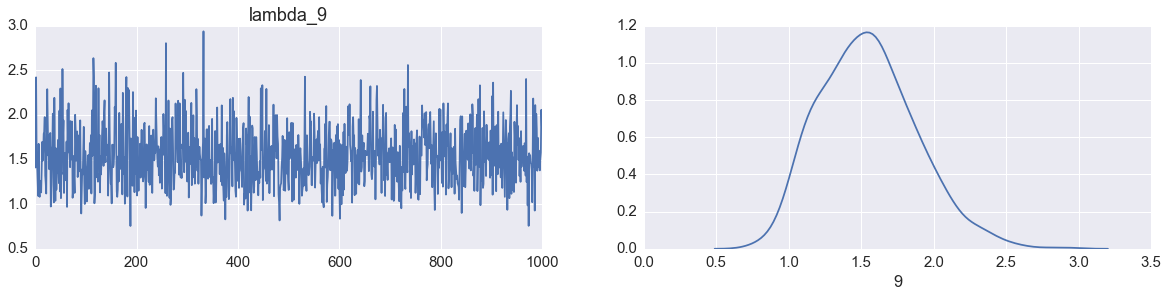

In [19]:
Lambdas = fit.extract()['lambda']

for i in range(10): 
    fig,axs = plt.subplots(1,2,figsize=(20,4))
    axs[0].plot(pd.DataFrame(Lambdas)[i])
    axs[0].set_title("lambda_" + str(i))
    sns.distplot(pd.DataFrame(Lambdas)[i], hist=False)

- Generate 1,000 samples of the number of failures $y_i$ from the prior distribution and plot the histogram or density. That is, for each of the 10 pumps, we want to see the distribution of 1,000 draws of the number of failures (5 points)

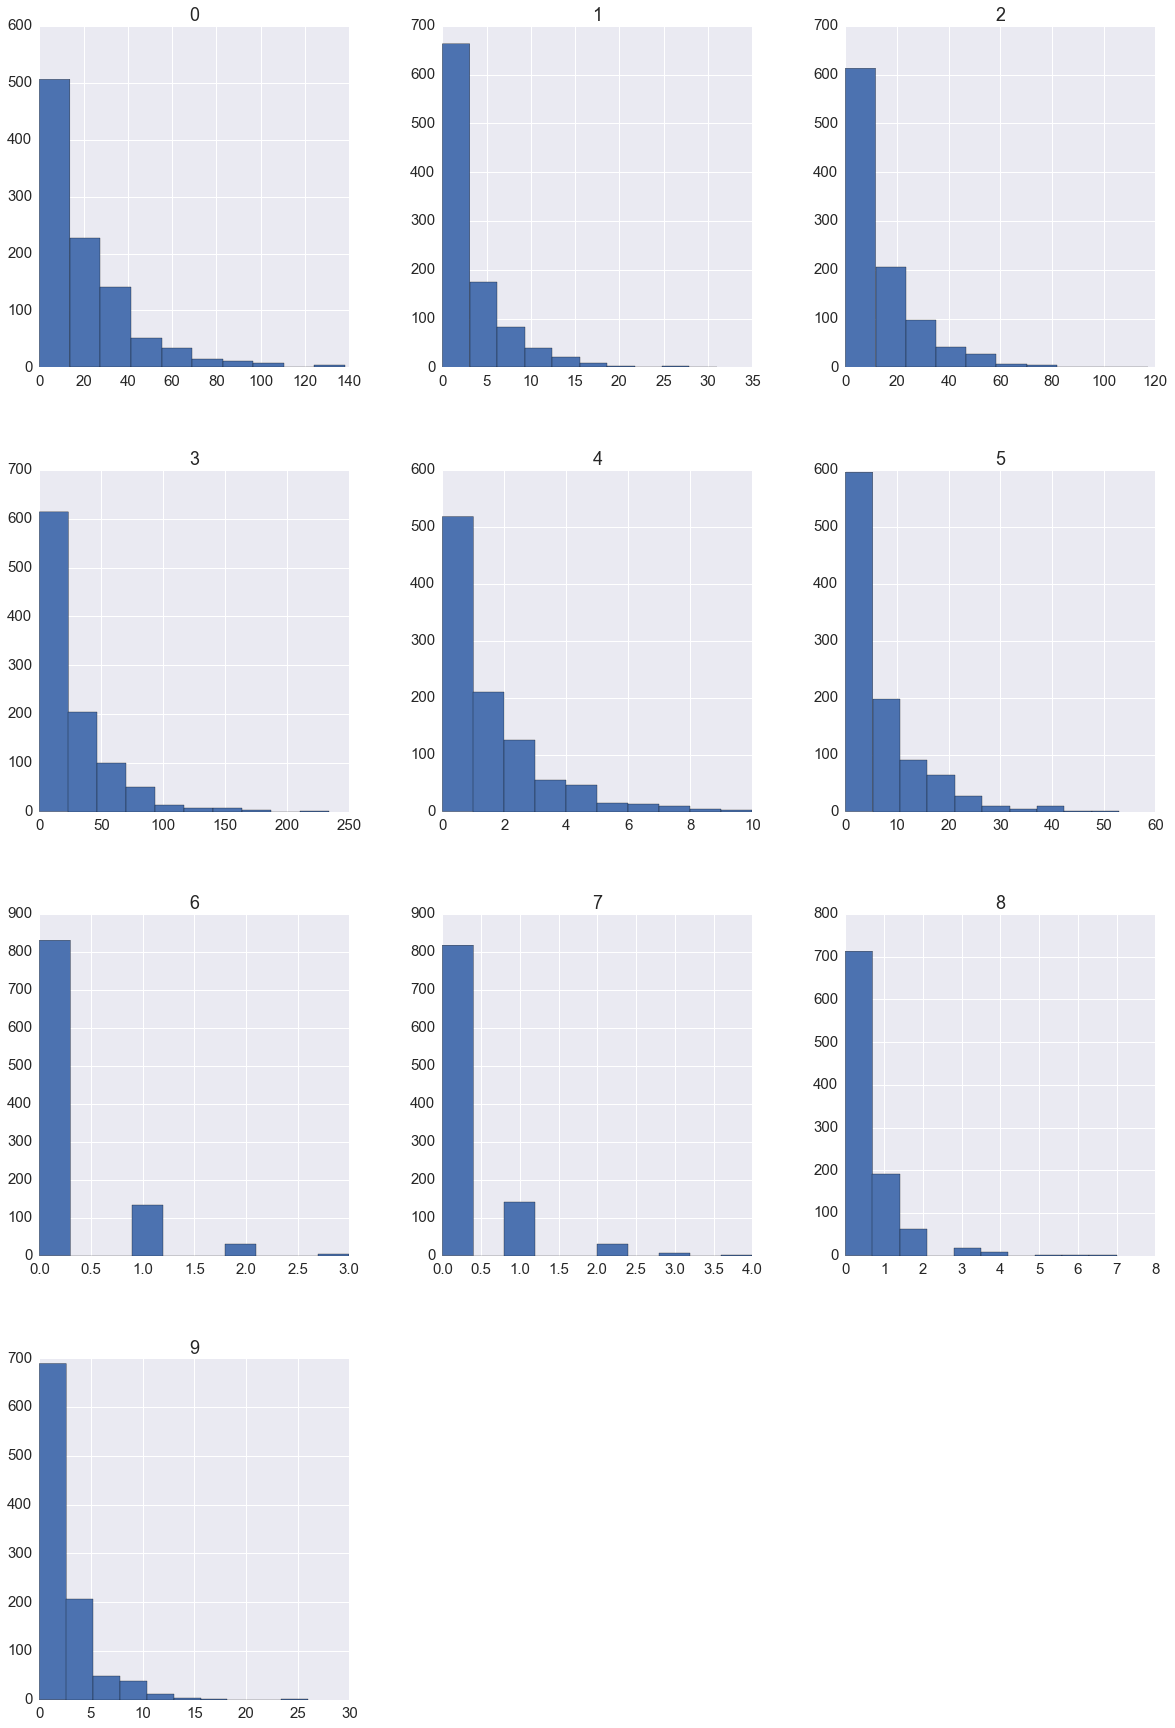

In [20]:
nuclear_prior = np.zeros((1000,10))

for i in range(1000):
    a = stats.gamma.rvs(a=1.8, size=1)
    b = stats.gamma.rvs(a=10.0, size=1)
    l = stats.gamma.rvs(a=a, scale=1/b, size=10)
    nuclear_prior[i,:] = stats.poisson.rvs(mu=l*t, size=10)

pd.DataFrame(nuclear_prior).hist(figsize=(20,30))
pass

- Generate 1,000 posterior predictive samples of the number of failures $y_i$ and plot the histogram or density. This is similar to the previous question but using draws from the posterior  (5 points)

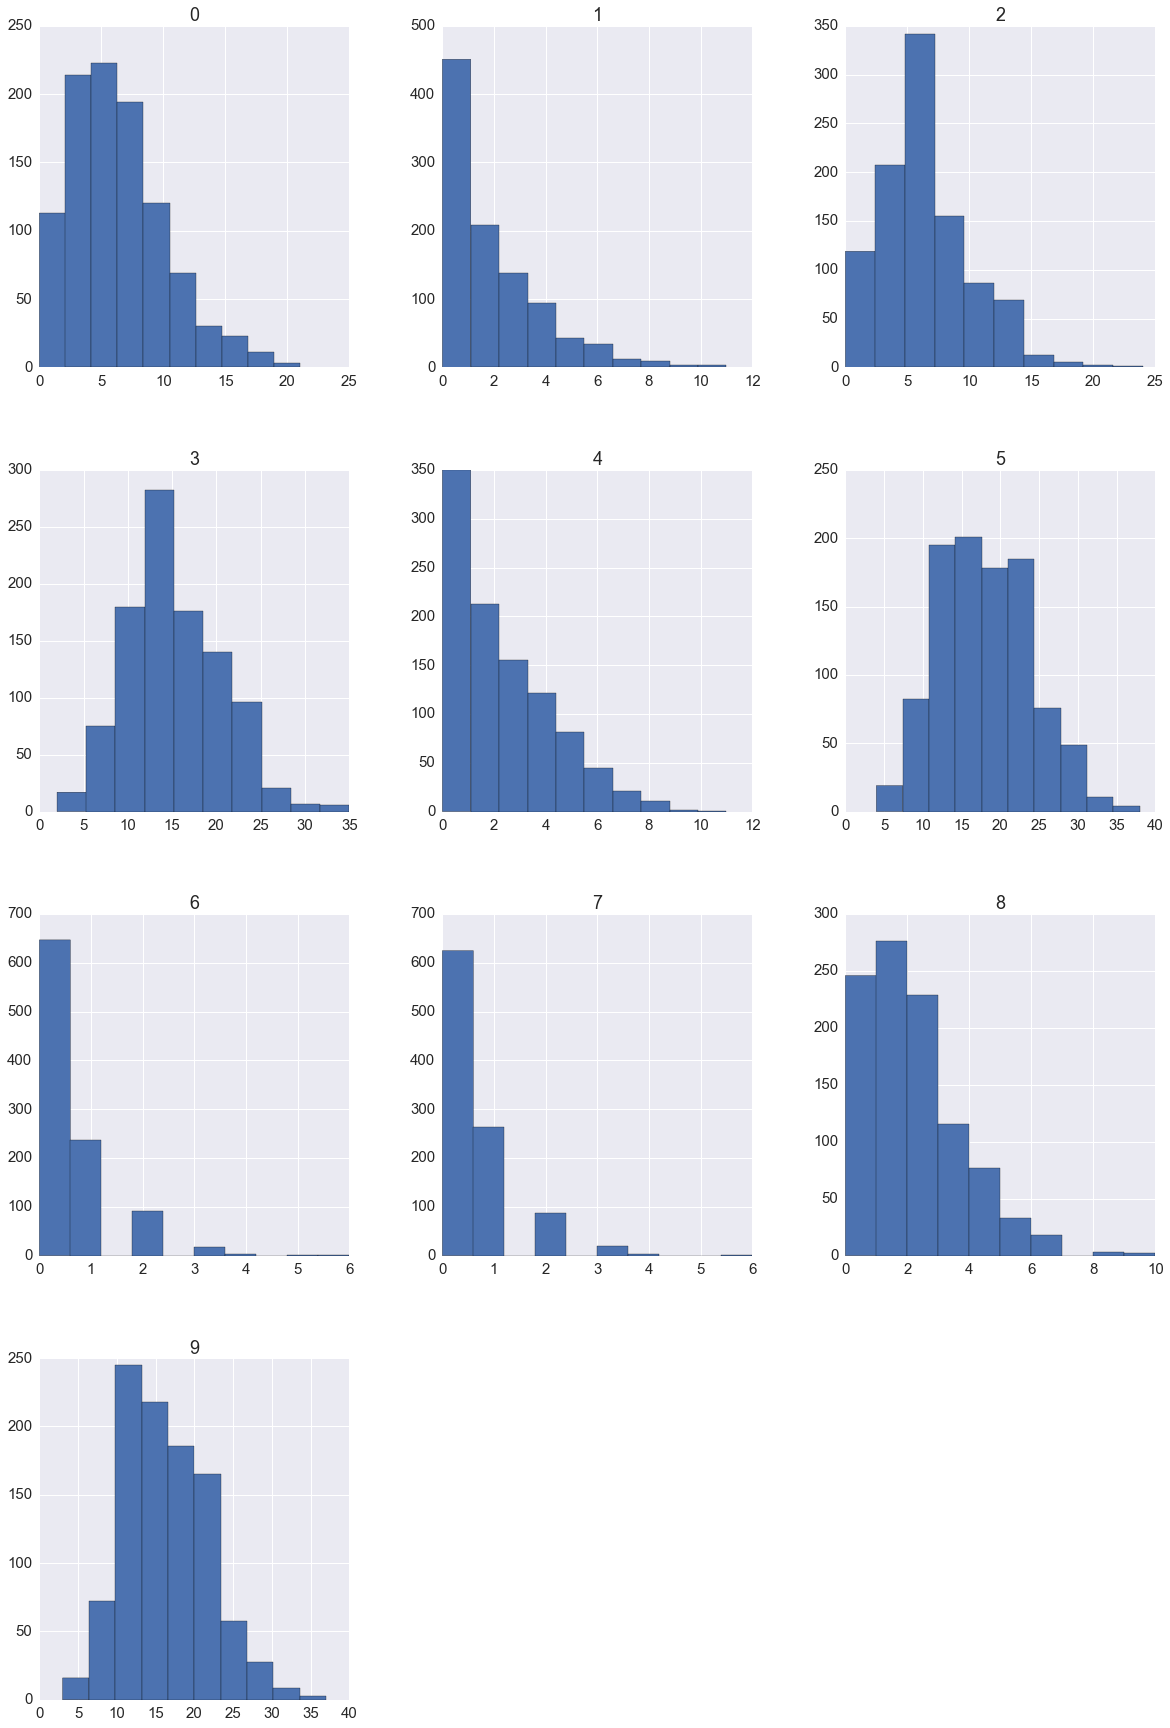

In [21]:
pd.DataFrame(fit['y_tilde']).hist(figsize=(20,30))
pass
